In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df_closed    = pd.read_csv("olist_closed_deals_dataset.csv")
df_qualified = pd.read_csv("olist_marketing_qualified_leads_dataset (1).csv")

In [3]:
df_closed.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [4]:
df_qualified.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [5]:
df_qualified.shape

(8000, 4)

In [6]:
df_closed.shape

(842, 14)

In [7]:
df_qualified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [8]:
df_closed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [186]:
date_time_str = df_closed['won_date']
date_time_obj = pd.DataFrame([datetime.strptime(x, '%Y-%m-%d %H:%M:%S' ,).strftime('%b %d') for x in date_time_str])[0]
date_time_highest = date_time_obj.value_counts().iloc[:30]
date_time_lowest  = date_time_obj.value_counts().iloc[-30:]

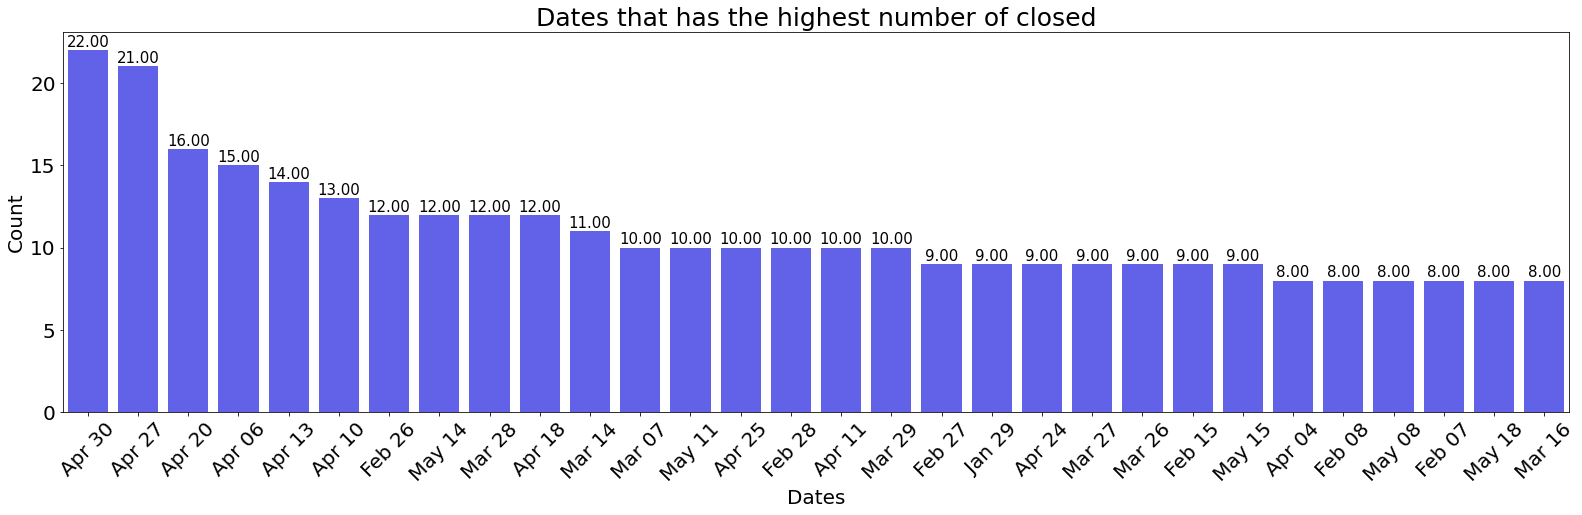

In [187]:
plt.figure(figsize=(27,7))

plot = sns.barplot(x=date_time_highest.index , y=date_time_highest.values , color='blue', alpha=.7)

for bar in plot.patches:
    plot.annotate(
                    format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                     ha='center' , va='center', size=15 , xytext=(0,8),
                     textcoords='offset points'
        )

plt.title('Dates that has the highest number of closed', fontsize=25)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.show()

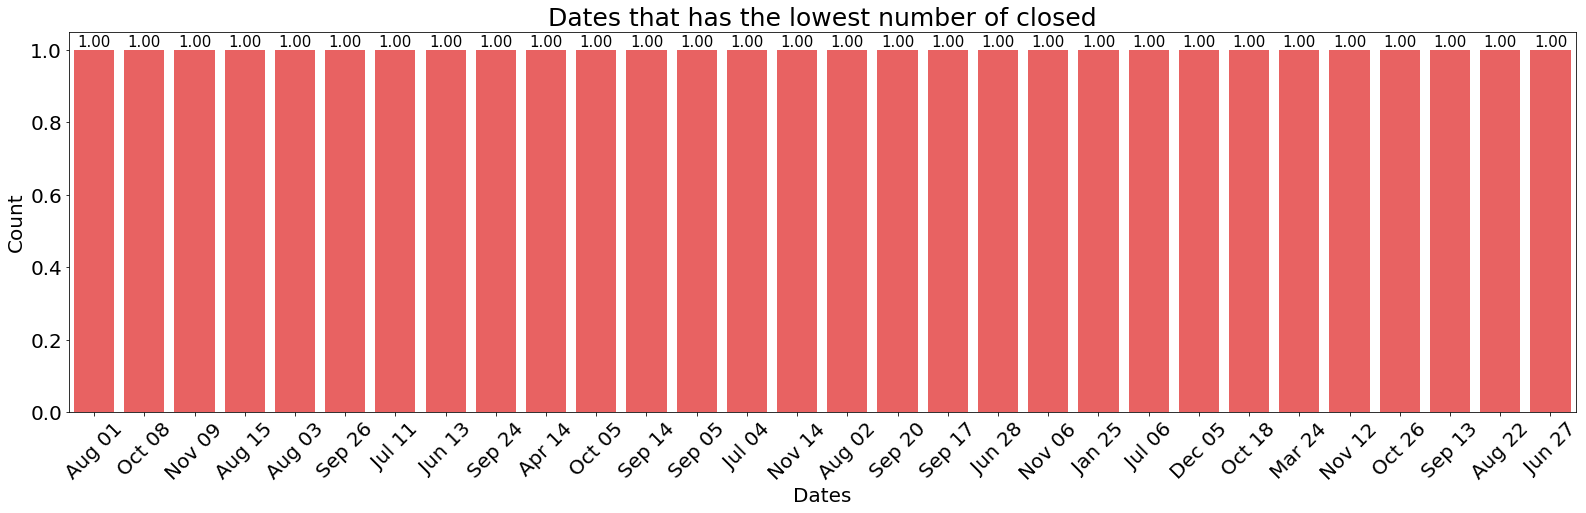

In [189]:
plt.figure(figsize=(27,7))

plot = sns.barplot(x=date_time_lowest.index , y=date_time_lowest.values , color='red', alpha=.7)

for bar in plot.patches:
    plot.annotate(
                    format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                     ha='center' , va='center', size=15 , xytext=(0,8),
                     textcoords='offset points'
        )

plt.title('Dates that has the lowest number of closed', fontsize=25)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.show()

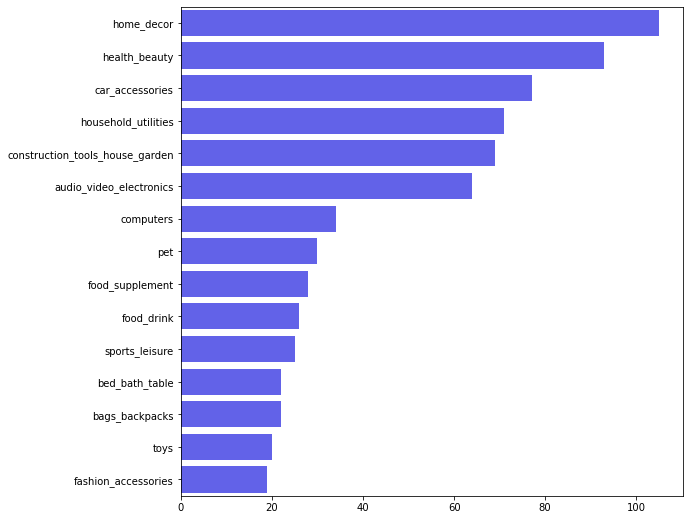

In [10]:
plt.figure(figsize=(9,9))

col = df_closed['business_segment'].value_counts().iloc[:15]

sns.barplot(x = col.values , y = col.index, color='blue', alpha=.7)
plt.show()

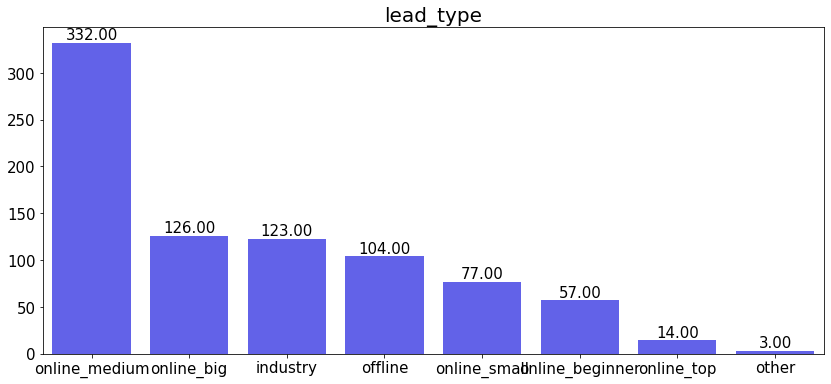

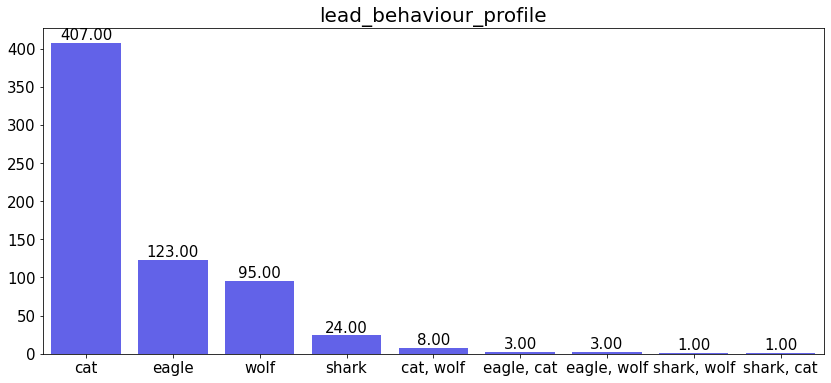

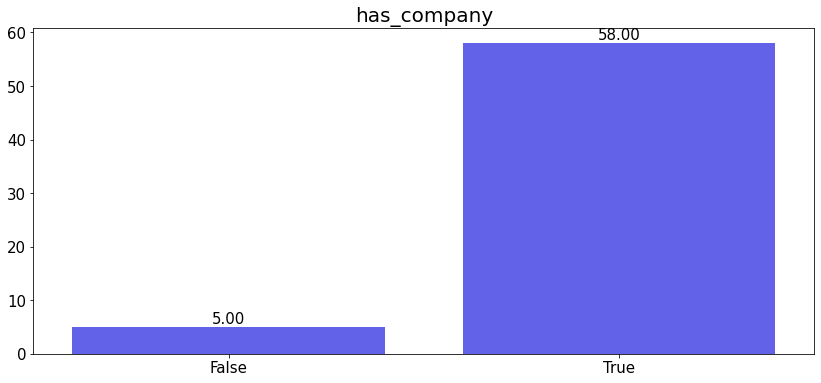

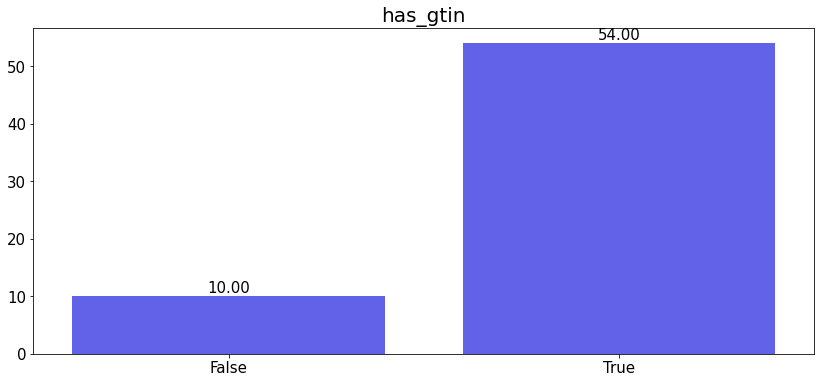

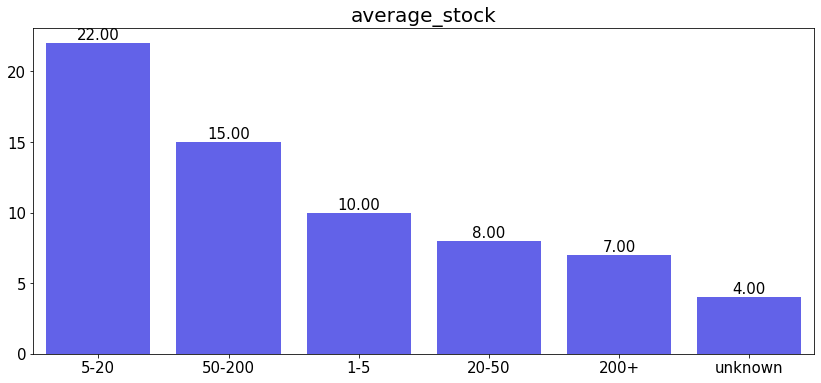

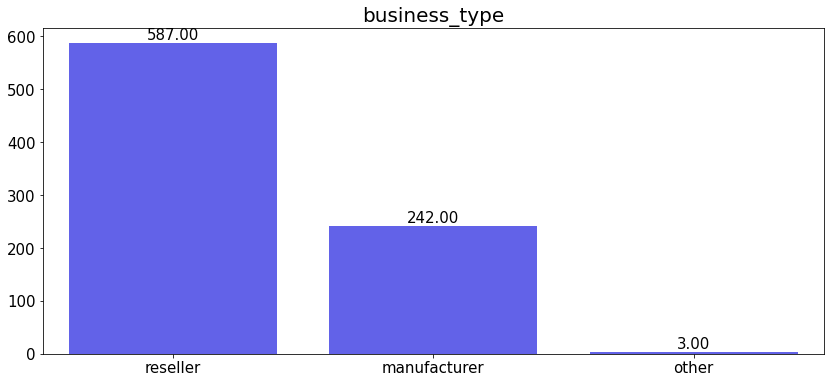

In [11]:
cols = ['lead_type','lead_behaviour_profile','has_company','has_gtin','average_stock','business_type']

for i in cols:
    c = df_closed[i].value_counts()
    
    plt.figure(figsize=(14,6))
    
    plot = sns.barplot(x = c.index , y = c.values , color='blue', alpha=.7)
    plt.title(i, fontsize=20)
    for bar in plot.patches:
        plot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    print('\n')

<AxesSubplot:ylabel='declared_product_catalog_size'>

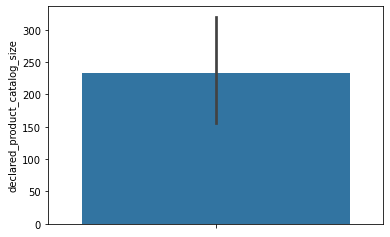

In [12]:
sns.barplot(y=df_closed['declared_product_catalog_size'])

<AxesSubplot:ylabel='declared_monthly_revenue'>

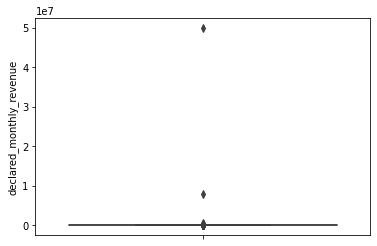

In [13]:
sns.boxplot(y=df_closed['declared_monthly_revenue'])

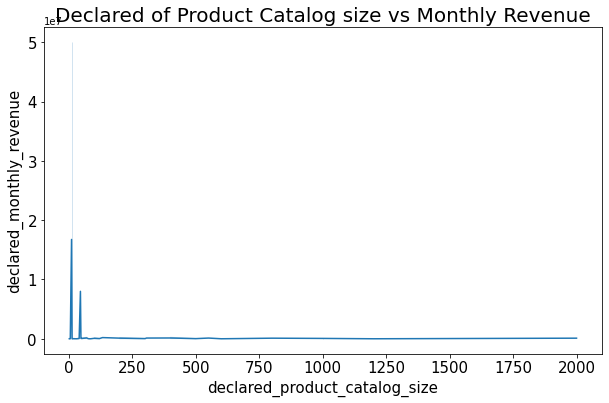

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df_closed['declared_product_catalog_size'] , y = df_closed['declared_monthly_revenue'])

plt.title('Declared of Product Catalog size vs Monthly Revenue',fontsize=20)

plt.xlabel('declared_product_catalog_size',fontsize=15)
plt.ylabel('declared_monthly_revenue',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<AxesSubplot:>

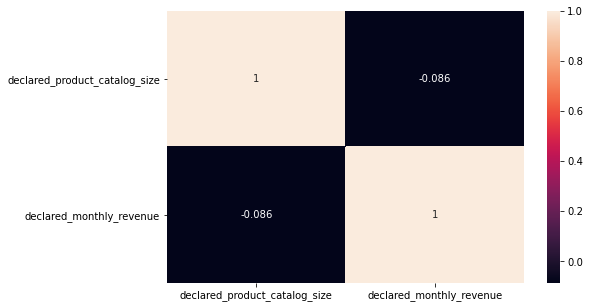

In [15]:
plt.figure(figsize=(8,5))

sns.heatmap(df_closed.corr(), annot=True) 


In [17]:
df_closed.head(2)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0


In [104]:
df_qualified.head(2)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search


In [102]:
first_contact_date = df_qualified['first_contact_date'].value_counts().iloc[:20]

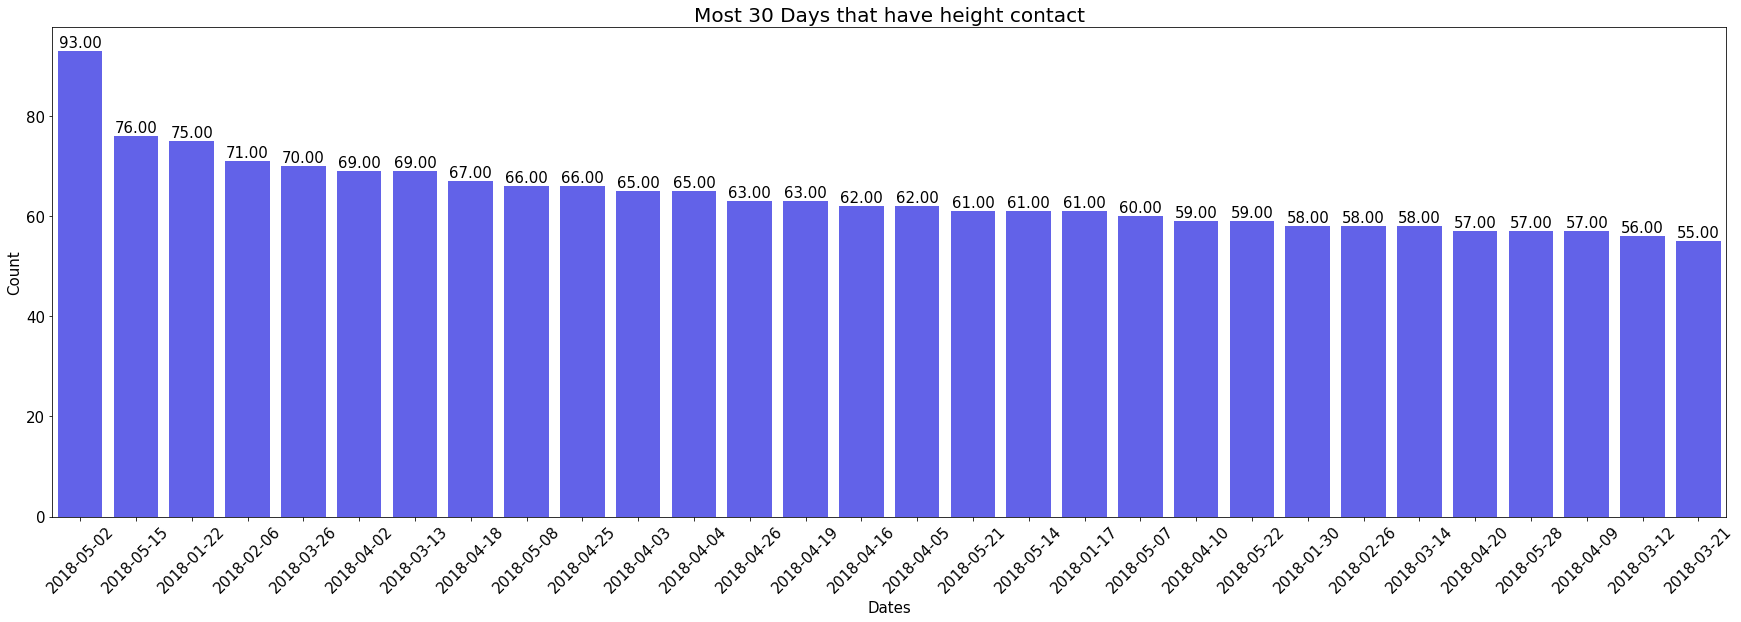

In [42]:
first_contact_date = df_qualified['first_contact_date'].value_counts()

plt.figure(figsize=(30,9))

plot = sns.barplot(x=first_contact_date.iloc[:30].index , y=first_contact_date.iloc[:30].values , color='blue', alpha=.7)

for bar in plot.patches:
    plot.annotate(
                    format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                     ha='center' , va='center', size=15 , xytext=(0,8),
                     textcoords='offset points'
        )

plt.title('Most 30 Days that have height contact', fontsize=20)
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.xticks(rotation=45 , fontsize=15)
plt.yticks(fontsize=15)

plt.show()

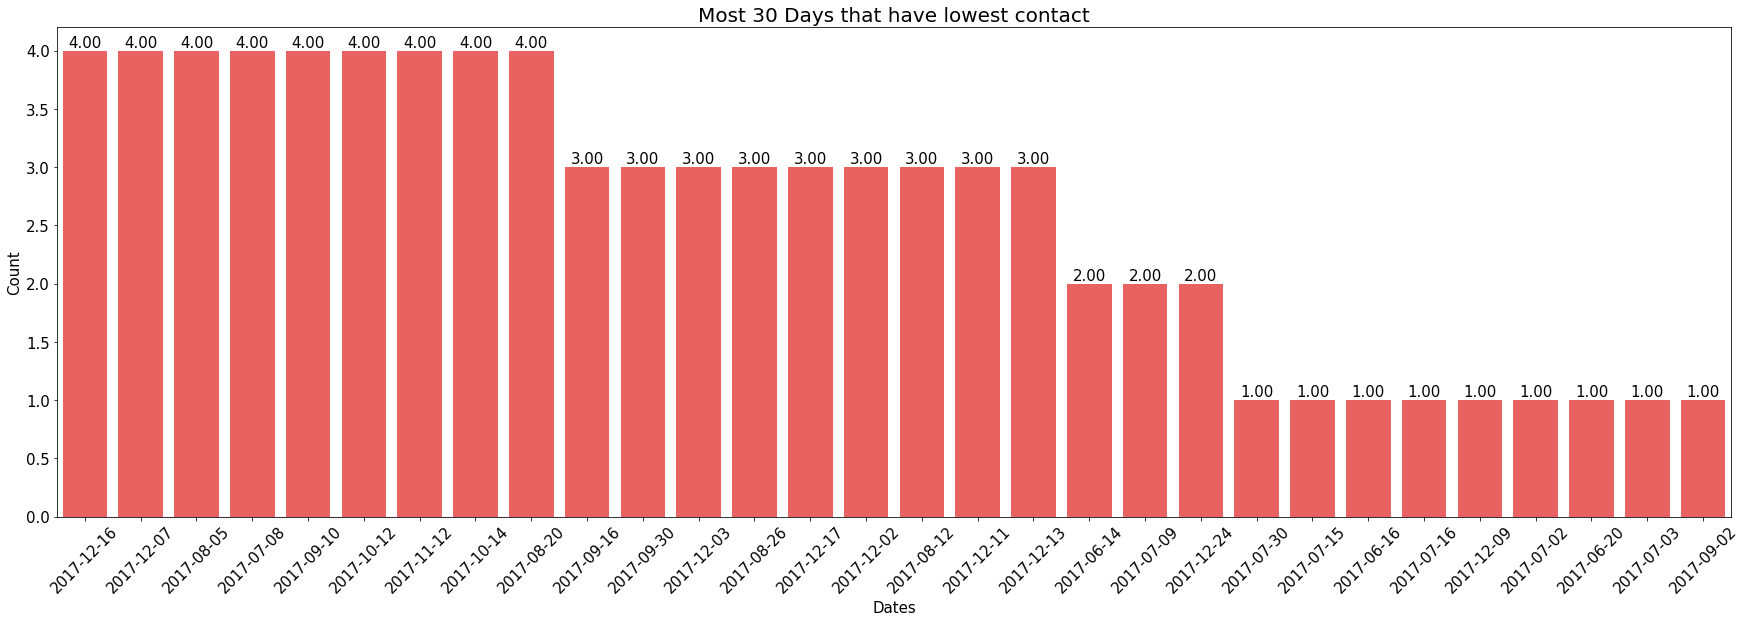

In [45]:
first_contact_date = df_qualified['first_contact_date'].value_counts()

plt.figure(figsize=(30,9))

plot = sns.barplot(x=first_contact_date.iloc[-30:].index , y=first_contact_date.iloc[-30:].values , color='red', alpha=.7)

for bar in plot.patches:
    plot.annotate(
                    format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                     ha='center' , va='center', size=15 , xytext=(0,8),
                     textcoords='offset points'
        )

plt.title('Most 30 Days that have lowest contact', fontsize=20)
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.xticks(rotation=45 , fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [88]:
date = df_qualified['first_contact_date']

date_time_obj = pd.DataFrame( [datetime.strptime(x, '%Y-%m-%d').strftime('%b') for x in date] )[0].value_counts()

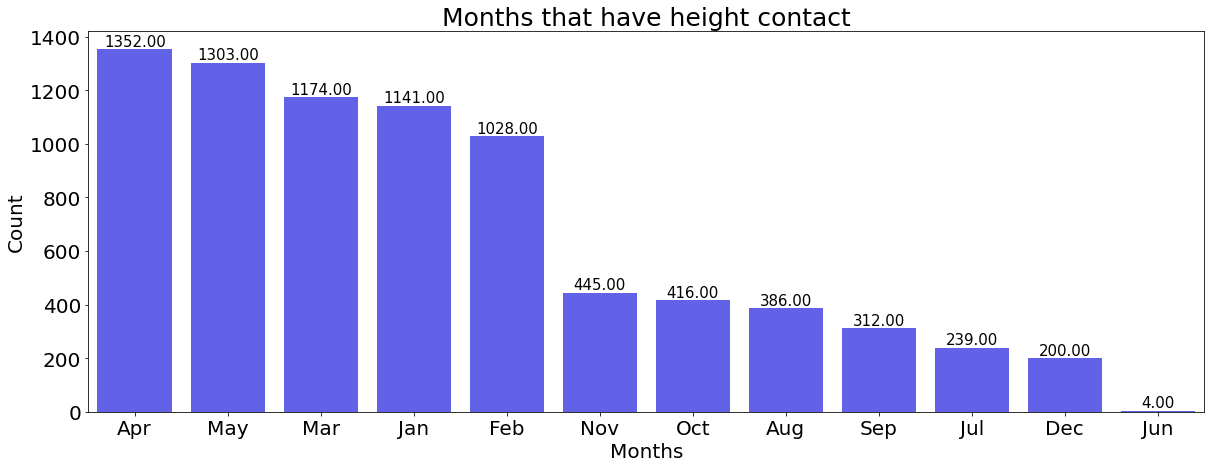

In [101]:
plt.figure(figsize=(20,7))

plot = sns.barplot(x=date_time_obj.index , y=date_time_obj.values , color='blue', alpha=.7)

for bar in plot.patches:
    plot.annotate(
                    format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                     ha='center' , va='center', size=15 , xytext=(0,8),
                     textcoords='offset points'
        )

plt.title('Months that have height contact', fontsize=25)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [162]:
landing_page = df_qualified['landing_page_id'].value_counts()
id_split_highest = [x[-5:] for x in  landing_page.iloc[:20].index]
id_split_lowest = [x[-5:] for x in  landing_page.iloc[-20:].index]

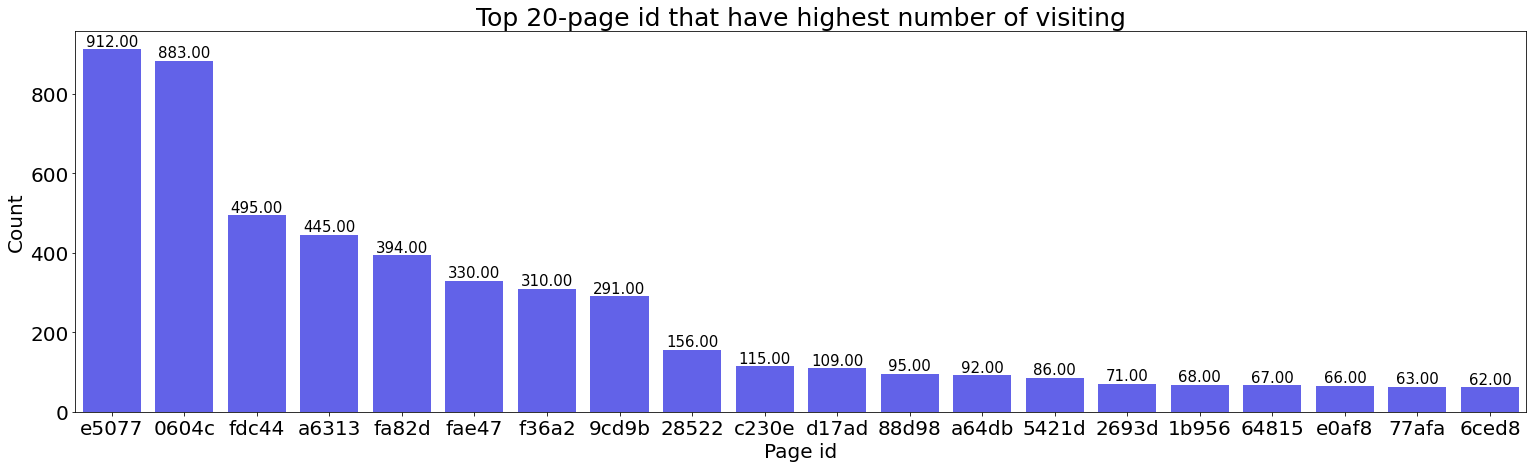

In [148]:
plt.figure(figsize=(26,7))

plot = sns.barplot(x=id_split_highest , y=landing_page.iloc[:20].values , color='blue', alpha=.7)

for bar in plot.patches:
    plot.annotate(
                    format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                     ha='center' , va='center', size=15 , xytext=(0,8),
                     textcoords='offset points'
        )

plt.title('Top 20-page id that have highest number of visiting', fontsize=25)
plt.xlabel('Page id', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

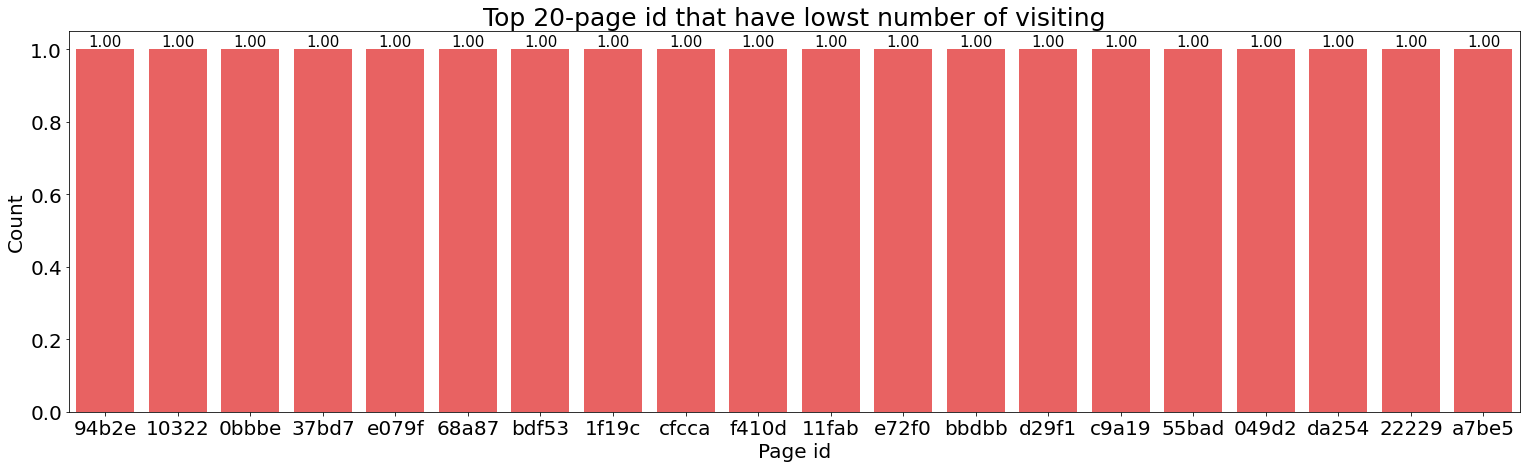

In [163]:
plt.figure(figsize=(26,7))

plot = sns.barplot(x=id_split_lowest , y=landing_page.iloc[-20:].values , color='red', alpha=.7)

for bar in plot.patches:
    plot.annotate(
                    format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                     ha='center' , va='center', size=15 , xytext=(0,8),
                     textcoords='offset points'
        )

plt.title('Top 20-page id that have lowst number of visiting', fontsize=25)
plt.xlabel('Page id', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [167]:
origin = df_qualified['origin'].value_counts()

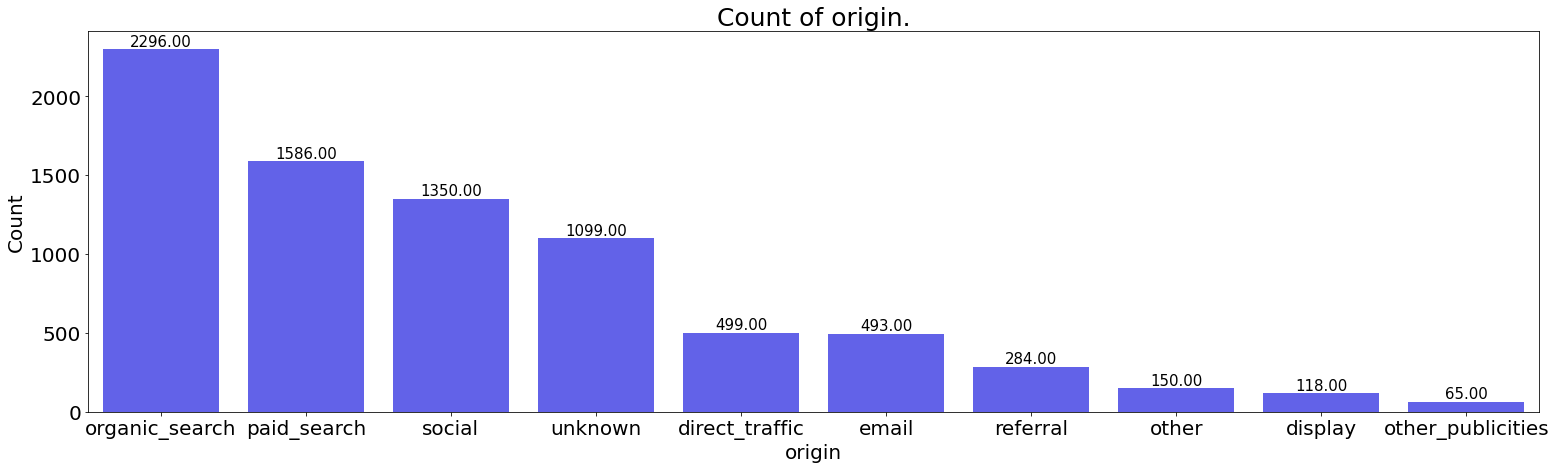

In [170]:
plt.figure(figsize=(26,7))

plot = sns.barplot(x=origin.index , y=origin.values , color='blue', alpha=.7)

for bar in plot.patches:
    plot.annotate(
                    format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                     ha='center' , va='center', size=15 , xytext=(0,8),
                     textcoords='offset points'
        )

plt.title('Count of origin.', fontsize=25)
plt.xlabel('origin', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [205]:
r = np.around((df_closed.shape[0] / df_qualified.shape[0]) * 100, 2)

print('The ratio of closed ordered to qualified is : ', r ,'%')

The ratio of closed ordered to qualified is :  10.52 %


****

# Thanks :)
**BY : Ahmed Fouad**